# Importing Libraries

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import cv2
import os
from skimage.io import imshow
import math

# Required Functions

In [88]:
def visualize_points_img(img,points):
    fig,ax = plt.subplots(1)
    ax.set_aspect('equal')
    plt.imshow(img)
    

    for i in range(0,len(points),2):
        x_norm = (points[i] + 0.5) * 96
        y_norm = (points[i+1] + 0.5) * 96
        circ = Circle((x_norm,y_norm),1, color='r')
        ax.add_patch(circ)

def has_nan_points(keypoints):
    for i in range(len(keypoints)):
        if math.isnan(keypoints.iloc[i]):
            return True
        
    return False

# Importing Data

In [16]:
# train data

df = pd.read_csv("../facial-keypoints-detection/training/training.csv")
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [20]:
len(df.iloc[:, :-1].columns)

30

In [4]:
df.shape

(7049, 31)

# Exploring Data

In [5]:
df["Image"]

0       238 236 237 238 240 240 239 241 241 243 240 23...
1       219 215 204 196 204 211 212 200 180 168 178 19...
2       144 142 159 180 188 188 184 180 167 132 84 59 ...
3       193 192 193 194 194 194 193 192 168 111 50 12 ...
4       147 148 160 196 215 214 216 217 219 220 206 18...
                              ...                        
7044    71 74 85 105 116 128 139 150 170 187 201 209 2...
7045    60 60 62 57 55 51 49 48 50 53 56 56 106 89 77 ...
7046    74 74 74 78 79 79 79 81 77 78 80 73 72 81 77 1...
7047    254 254 254 254 254 238 193 145 121 118 119 10...
7048    53 62 67 76 86 91 97 105 105 106 107 108 112 1...
Name: Image, Length: 7049, dtype: object

In [11]:
len(df["Image"][0])

33593

In [61]:
test_img = np.array(df.iloc[0,-1].split(" ")).astype('int').reshape(96,96)
test_img

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

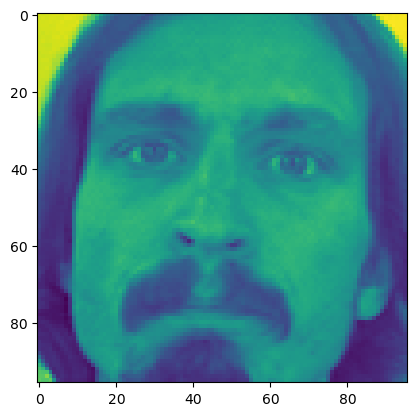

In [62]:
plt.imshow(test_img)

In [63]:
test_keypoints = df.iloc[0,:-1].astype(int)
test_keypoints.values

array([66, 39, 30, 36, 59, 39, 73, 39, 36, 37, 23, 37, 56, 29, 80, 32, 40,
       29, 16, 29, 44, 57, 61, 79, 28, 77, 43, 72, 43, 84])

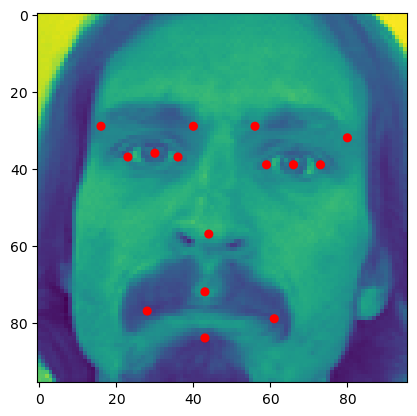

In [70]:
test_img = test_img / 255
test_keypoints = df.iloc[0,:-1].astype(int)
test_keypoints = test_keypoints.values
test_keypoints = test_keypoints/96 - 0.5 # normalizing images
visualize_points_img(test_img,test_keypoints)

# Collect Data

In [91]:
def collect_data(data,training_images,training_labels):
    for i in range(len(data)):
        points = data.iloc[i,:-1]
        if has_nan_points(points) is False:
            img = data.iloc[i,-1]        # Get the image data
            img = np.array(img.split(' ')).astype(int)    
            img = np.reshape(img, (96,96))        # Reshape into an array of size 96x96
            img = img/255         # Normalize image
            
            keypoints = data.iloc[i,:-1].astype(int).values
            keypoints = keypoints/96 - 0.5  # Normalize keypoint coordinates
            
            training_images.append(img)
            training_labels.append(keypoints)
        print(f"{i} files done!!")


In [92]:
training_images = []
training_labels = []
collect_data(df,training_images,training_labels)

0 files done!!
1 files done!!
2 files done!!
3 files done!!
4 files done!!
5 files done!!
6 files done!!
7 files done!!
8 files done!!
9 files done!!
10 files done!!
11 files done!!
12 files done!!
13 files done!!
14 files done!!
15 files done!!
16 files done!!
17 files done!!
18 files done!!
19 files done!!
20 files done!!
21 files done!!
22 files done!!
23 files done!!
24 files done!!
25 files done!!
26 files done!!
27 files done!!
28 files done!!
29 files done!!
30 files done!!
31 files done!!
32 files done!!
33 files done!!
34 files done!!
35 files done!!
36 files done!!
37 files done!!
38 files done!!
39 files done!!
40 files done!!
41 files done!!
42 files done!!
43 files done!!
44 files done!!
45 files done!!
46 files done!!
47 files done!!
48 files done!!
49 files done!!
50 files done!!
51 files done!!
52 files done!!
53 files done!!
54 files done!!
55 files done!!
56 files done!!
57 files done!!
58 files done!!
59 files done!!
60 files done!!
61 files done!!
62 files done!!
63

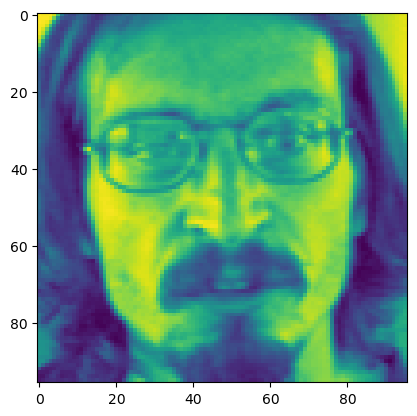

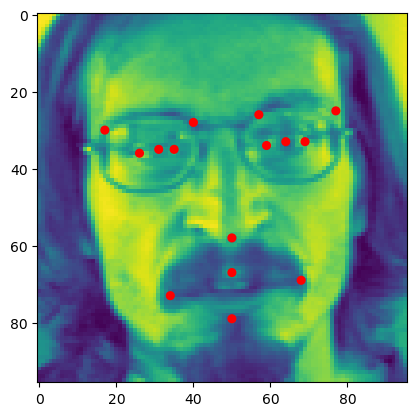

In [95]:
visualize_points_img(training_images[100],training_labels[100])

In [167]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from read_data import get_train_data

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Dropout, Flatten


def my_model():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, strides=2,
              padding='same', input_shape=(96, 96, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(64, kernel_size=3, strides=2,
              padding='same', activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(128, kernel_size=3, strides=2,
              padding='same', activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(64, kernel_size=3, strides=2,
              padding='same', activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(16, kernel_size=3, strides=2,
              padding='same', activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(30, activation="linear"))

    model.compile(optimizer='adam', loss="mse", metrics=["mse"])

    return model


model = my_model()
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 24, 24, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_36 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 2, 2, 128)        

In [130]:
from skimage.transform import resize
from skimage.color import rgb2gray

def loading_trained_model(model):
    return model.load_weights('../project/weights/checkpoint-50.hdf5')

def model_testing(model,img_path):
    img = cv2.imread(img_path)
    img = rgb2gray(img) 
    img = resize(img,(1,96,96,1))
    prediction = model.predict(img)
    visualize_points_img(img=img,points=prediction[0])

In [131]:
model = loading_trained_model(model)


In [132]:
img_path = "../project/test_images/02.png"
model_testing(model=model,img_path=img_path)

AttributeError: 'NoneType' object has no attribute 'predict'

In [133]:
img = cv2.imread(img_path)
img.shape

(249, 198, 3)

In [147]:
img_path = "../project/test_images/04.PNG"

img = cv2.imread(img_path)
img = rgb2gray(img) 
img = resize(img,(1,96,96,1))
img

array([[[[0.24499615],
         [0.24499615],
         [0.24499615],
         ...,
         [0.24499615],
         [0.24499615],
         [0.24499615]],

        [[0.22570534],
         [0.22570534],
         [0.22570534],
         ...,
         [0.22570534],
         [0.22570534],
         [0.22570534]],

        [[0.20458899],
         [0.20458899],
         [0.20458899],
         ...,
         [0.20458899],
         [0.20458899],
         [0.20458899]],

        ...,

        [[0.19221277],
         [0.19221277],
         [0.19221277],
         ...,
         [0.19221277],
         [0.19221277],
         [0.19221277]],

        [[0.21518462],
         [0.21518462],
         [0.21518462],
         ...,
         [0.21518462],
         [0.21518462],
         [0.21518462]],

        [[0.24777575],
         [0.24777575],
         [0.24777575],
         ...,
         [0.24777575],
         [0.24777575],
         [0.24777575]]]])

In [148]:
img.shape

(1, 96, 96, 1)

In [168]:
model.load_weights('../project/weights/checkpoint-200.hdf5')

In [138]:
pred = model.predict(img)

1/1 [==============================] - 0s 338ms/step


In [140]:
pred[0]

array([-0.1995894 , -0.14132036,  0.19737913, -0.14838165, -0.12958637,
       -0.13090745, -0.26946056, -0.13443477,  0.12707663, -0.13868584,
        0.2755296 , -0.1444496 , -0.09479679, -0.21685943, -0.33735135,
       -0.22268064,  0.09843025, -0.21779823,  0.34512705, -0.22807613,
        0.01080087,  0.10478849, -0.13782713,  0.31361735,  0.1622554 ,
        0.30613214,  0.01134088,  0.27994373,  0.01352175,  0.38224056],
      dtype=float32)

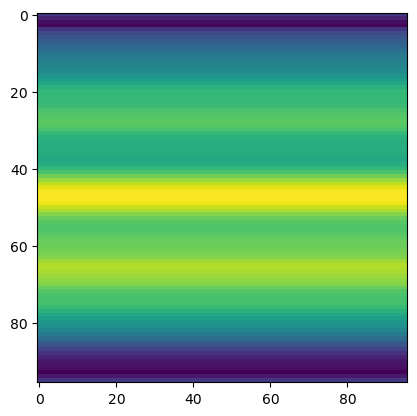

In [150]:
plt.imshow(img.reshape(96,96,1))

In [151]:
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam
from skimage.io import imshow
from os.path import join
import glob
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from matplotlib.patches import Circle


In [171]:
# Testing the model
def test_model(model,f1):    
    img = cv2.imread(f1)
    print(img.shape,"DDDDDDDDD")
    # img = rgb2gray(img)         # Convert RGB image to grayscale
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    test_img = resize(img, (96,96))   
    test_img = np.array(test_img)
    test_img_input = np.reshape(test_img, (1,96,96,1))      # Model takes input of shape = [batch_size, height, width, no. of channels]
    prediction = model.predict(test_img_input)      # shape = [batch_size, values]
    visualize_points_img(test_img, prediction[0])
    

(2984, 2387, 3) DDDDDDDDD
1/1 [==============================] - 0s 53ms/step


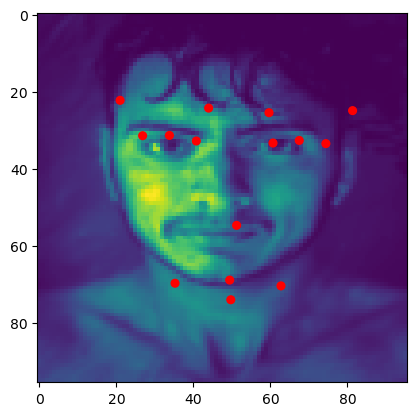

In [172]:
f1 = "../project/test_images/03.jpg"
test_model(model,f1)

# Live Webcam

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from read_data import get_train_data, visualize_points_img

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D, Dropout, Flatten
from keras.callbacks import ModelCheckpoint

In [3]:
def my_model():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=3, strides=2,
              padding='same', input_shape=(96, 96, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(64, kernel_size=3, strides=2,
              padding='same', activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(128, kernel_size=3, strides=2,
              padding='same', activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(64, kernel_size=3, strides=2,
              padding='same', activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(16, kernel_size=3, strides=2,
              padding='same', activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(30, activation="linear"))

    model.compile(optimizer='adam',
                  loss="mean_absolute_error", metrics=["mse"])

    return model

def loading_trained_model(model):
    model.load_weights('weights/checkpoint-200.hdf5')
    return model


In [4]:
model = my_model()
model = loading_trained_model(model)

In [7]:
import numpy as np
import cv2



def read_image_from_webcam():
    haarcascade = cv2.CascadeClassifier("./haarcascade/haarcascade_frontalface_default.xml")
    # define a video capture object

    camera = cv2.VideoCapture(0)

    while (True):
        ret, frame = camera.read()
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        detected_face = haarcascade.detectMultiScale(gray_frame, 1.3, 5)


        for (x,y,w,h) in detected_face:
            cv2.rectangle(gray_frame,(x,y),(x+w,y+h),(0,255,0),2)
            roi_gray = gray_frame[y:y+h, x:x+w]
            # roi_color = frame[y:y+h, x:x+w]
            img_copy = np.copy(frame)

            original_width = roi_gray.shape[1]
            original_height = roi_gray.shape[0]

            img_gray = cv2.resize(roi_gray,(96,96))
            img_gray = img_gray/255

            model_prediction_image = np.reshape(img_gray,(1,96,96,1))
            predicted_keypoints = model.predict(model_prediction_image)[0]
            
            x_coordinate = predicted_keypoints[0::2]
            y_coordinate = predicted_keypoints[1::2]

            x_coordinate_denormalized = (x_coordinate + 0.5) * original_width
            y_coordinate_denormalized = (y_coordinate + 0.5) * original_height

            # 10 is on nose

            for i in range(len(x_coordinate_denormalized)):

                center = (int(x_coordinate_denormalized[i]), int(y_coordinate_denormalized[i]))
                cv2.circle(roi_gray, center, 5, (0,0,0), -1)

            # Particular keypoints for scaling and positioning of the filter
            left_lip_coordinates = (int(x_coordinate_denormalized[11]), int(y_coordinate_denormalized[11]))
            right_lip_coordinates = (int(x_coordinate_denormalized[12]), int(y_coordinate_denormalized[12]))
            top_lip_coordinates = (int(x_coordinate_denormalized[13]), int(y_coordinate_denormalized[13]))
            bottom_lip_coordinates = (int(x_coordinate_denormalized[14]), int(y_coordinate_denormalized[14]))
            left_eye_coordinates = (int(x_coordinate_denormalized[3]), int(y_coordinate_denormalized[3]))
            right_eye_coordinates = (int(x_coordinate_denormalized[5]), int(y_coordinate_denormalized[5]))
            brow_coordinates = (int(x_coordinate_denormalized[6]), int(y_coordinate_denormalized[6]))


            # Scale filter according to keypoint coordinates
            beard_width = right_lip_coordinates[0] - left_lip_coordinates[0]
            glasses_width = right_eye_coordinates[0] - left_eye_coordinates[0]
        
            img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2BGRA)       # Used for transparency overlay of filter using the alpha channel

            # sunglass filter
            glasses = cv2.imread('./face-filters/sunglass.png', -1)
            glasses = cv2.resize(glasses, (glasses_width*2,150))
            gw,gh,gc = glasses.shape
            
            for i in range(0,gw):       # Overlay the filter based on the alpha channel
                for j in range(0,gh):
                    if glasses[i,j][3] != 0:
                        img_copy[brow_coordinates[1]+i+y-50, left_eye_coordinates[0]+j+x-60] = glasses[i,j]

            img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGRA2BGR)  
            cv2.imshow('Output',img_copy)
 
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # After the loop release the cap object
    camera.release()
    # Destroy all the windows
    cv2.destroyAllWindows()


In [8]:
read_image_from_webcam()

1/1 [==============================] - 0s 55ms/step


In [40]:
santa_filter1 = cv2.resize(santa_filter, (beard_width*3,150))
santa_filter1.shape

(150, 171, 3)

In [35]:
santa_filter

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [238, 238, 238],
        [238, 238, 238],
        [238, 238, 238]],

       ...,

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[238, 238, 238],
        [238, 238, 238],
        [238, 238, 238],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]